<a href="https://colab.research.google.com/github/Nataliya2401/DS_11/blob/main/hw_11_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as K
from sklearn.model_selection import train_test_split
%matplotlib inline

In [20]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, GRU, SimpleRNN, LSTM, Bidirectional
from keras.utils import pad_sequences

In [3]:
from keras.src import callbacks
from keras.optimizers import Adam, Adamax
from keras.callbacks import EarlyStopping

In [4]:
max_features = 10000 # загальна кількість класів
maxlen = 500
batch_size=64

In [5]:
# Завантажуємо датасет
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[10]])
print(decoded_review)

1641221/1641221 [==============================] - 0s 0us/step
? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? french horror cinema has seen something of a revival over the last couple of years with great films such as inside and ? romance ? on to the scene ? ? the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made ? was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is ? by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named ? sent to prison for fraud he is put in a cell with three others the quietly insane ? body building ? marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that 

In [32]:
# Підготовка даних
x_train_pr = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

Simple_RNN

In [33]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [35]:
history_s_rnn = model.fit(x_train_pr, y_train, epochs=9, batch_size=batch_size, validation_split=0.3)

Epoch 1/9
274/274 [==============================] - 42s 147ms/step - loss: 0.6936 - accuracy: 0.5076 - val_loss: 0.6919 - val_accuracy: 0.5235
Epoch 2/9
274/274 [==============================] - 42s 155ms/step - loss: 0.6749 - accuracy: 0.5907 - val_loss: 0.6290 - val_accuracy: 0.6715
Epoch 3/9
274/274 [==============================] - 42s 155ms/step - loss: 0.5042 - accuracy: 0.7694 - val_loss: 0.4177 - val_accuracy: 0.8225
Epoch 4/9
274/274 [==============================] - 41s 149ms/step - loss: 0.3418 - accuracy: 0.8630 - val_loss: 0.3487 - val_accuracy: 0.8529
Epoch 5/9
274/274 [==============================] - 40s 147ms/step - loss: 0.2764 - accuracy: 0.8941 - val_loss: 0.3647 - val_accuracy: 0.8439
Epoch 6/9
274/274 [==============================] - 42s 155ms/step - loss: 0.2309 - accuracy: 0.9149 - val_loss: 0.3513 - val_accuracy: 0.8621
Epoch 7/9
274/274 [==============================] - 40s 148ms/step - loss: 0.1775 - accuracy: 0.9379 - val_loss: 0.3797 - val_accuracy:

In [36]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)

Test loss:  0.4634096622467041
Test accuracy:  0.8397200107574463


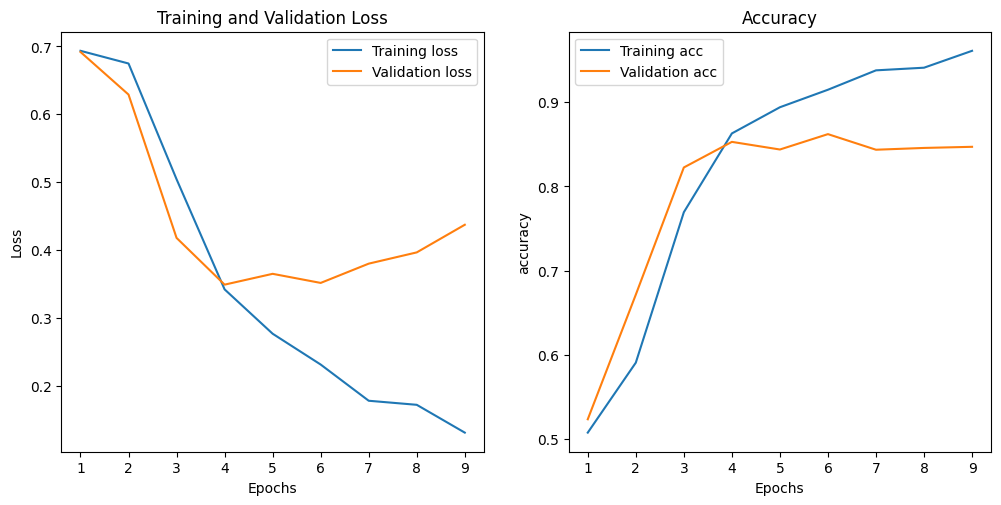

In [37]:
history_dict = history_s_rnn.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) +1)

plt.figure(figsize=(12,12))

plt.subplot(2, 2, 1)
plt.plot(epochs, loss_values, label='Training loss')
plt.plot(epochs, val_loss_values, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
val_acc_values = history_dict['val_accuracy']
acc_values = history_dict['accuracy']
plt.plot(epochs, acc_values, label='Training acc')
plt.plot(epochs, val_acc_values, label='Validation acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [25]:
predictions = model.predict(x_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]
# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

782/782 [==============================] - 20s 25ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1


# GRU

In [6]:
x_train_pr = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [7]:
model_gru = Sequential()
model_gru.add(Embedding(max_features, 32))
model_gru.add(GRU(32))
model_gru.add(Dense(128, activation='relu'))
model_gru.add(Dropout(0.3))
model_gru.add(Dense(1, activation='sigmoid'))

In [8]:
model_gru.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [10]:
history_gru = model_gru.fit(x_train_pr, y_train, epochs=9, batch_size=batch_size, validation_split=0.2)

Epoch 1/9
313/313 [==============================] - 92s 284ms/step - loss: 0.6922 - accuracy: 0.5372 - val_loss: 0.6901 - val_accuracy: 0.5812
Epoch 2/9
313/313 [==============================] - 89s 284ms/step - loss: 0.6160 - accuracy: 0.6812 - val_loss: 0.3864 - val_accuracy: 0.8334
Epoch 3/9
313/313 [==============================] - 87s 279ms/step - loss: 0.3109 - accuracy: 0.8709 - val_loss: 0.3012 - val_accuracy: 0.8740
Epoch 4/9
313/313 [==============================] - 89s 285ms/step - loss: 0.2274 - accuracy: 0.9140 - val_loss: 0.2929 - val_accuracy: 0.8860
Epoch 5/9
313/313 [==============================] - 87s 278ms/step - loss: 0.1850 - accuracy: 0.9334 - val_loss: 0.2895 - val_accuracy: 0.8856
Epoch 6/9
313/313 [==============================] - 85s 272ms/step - loss: 0.1543 - accuracy: 0.9489 - val_loss: 0.3049 - val_accuracy: 0.8874
Epoch 7/9
313/313 [==============================] - 86s 274ms/step - loss: 0.1297 - accuracy: 0.9588 - val_loss: 0.3205 - val_accuracy:

In [12]:
test_loss, test_acc = model_gru.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)

Test loss:  0.3826475143432617
Test accuracy:  0.8682399988174438


In [13]:
predictions = model_gru.predict(x_test)
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

782/782 [==============================] - 34s 43ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1


# LSTM

In [15]:
x_train_pr = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [16]:
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32))
model_lstm.add(GRU(32))
model_lstm.add(Dense(128, activation='relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(1, activation='sigmoid'))

In [17]:
model_lstm.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [18]:
history_lstm = model_lstm.fit(x_train_pr, y_train, epochs=9, batch_size=batch_size, validation_split=0.2)

Epoch 1/9
313/313 [==============================] - 93s 287ms/step - loss: 0.6918 - accuracy: 0.5469 - val_loss: 0.6887 - val_accuracy: 0.5608
Epoch 2/9
313/313 [==============================] - 86s 276ms/step - loss: 0.6415 - accuracy: 0.6806 - val_loss: 0.5234 - val_accuracy: 0.7630
Epoch 3/9
313/313 [==============================] - 87s 279ms/step - loss: 0.4229 - accuracy: 0.8214 - val_loss: 0.4224 - val_accuracy: 0.8040
Epoch 4/9
313/313 [==============================] - 87s 277ms/step - loss: 0.3339 - accuracy: 0.8664 - val_loss: 0.3731 - val_accuracy: 0.8406
Epoch 5/9
313/313 [==============================] - 83s 265ms/step - loss: 0.2843 - accuracy: 0.8889 - val_loss: 0.3545 - val_accuracy: 0.8428
Epoch 6/9
313/313 [==============================] - 84s 268ms/step - loss: 0.2434 - accuracy: 0.9082 - val_loss: 0.3425 - val_accuracy: 0.8586
Epoch 7/9
313/313 [==============================] - 86s 274ms/step - loss: 0.2178 - accuracy: 0.9194 - val_loss: 0.3297 - val_accuracy:

In [19]:
test_loss, test_acc = model_lstm.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)

Test loss:  0.3604917526245117
Test accuracy:  0.8634799718856812


# BRNN

In [21]:
x_train_pr = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [22]:
model_brnn = Sequential()
model_brnn.add(Embedding(max_features, 32))
model_brnn.add(Bidirectional(GRU(32)))
model_brnn.add(Dense(128, activation='relu'))
model_brnn.add(Dropout(0.3))
model_brnn.add(Dense(1, activation='sigmoid'))

In [23]:
model_brnn.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [24]:
history_brnn = model_brnn.fit(x_train_pr, y_train, epochs=9, batch_size=batch_size, validation_split=0.2)

Epoch 1/9
313/313 [==============================] - 172s 535ms/step - loss: 0.6925 - accuracy: 0.5231 - val_loss: 0.6907 - val_accuracy: 0.5742
Epoch 2/9
313/313 [==============================] - 163s 522ms/step - loss: 0.6020 - accuracy: 0.6905 - val_loss: 0.3902 - val_accuracy: 0.8258
Epoch 3/9
313/313 [==============================] - 162s 518ms/step - loss: 0.3017 - accuracy: 0.8772 - val_loss: 0.3091 - val_accuracy: 0.8694
Epoch 4/9
313/313 [==============================] - 163s 521ms/step - loss: 0.2194 - accuracy: 0.9177 - val_loss: 0.2879 - val_accuracy: 0.8834
Epoch 5/9
313/313 [==============================] - 161s 515ms/step - loss: 0.1748 - accuracy: 0.9386 - val_loss: 0.2929 - val_accuracy: 0.8866
Epoch 6/9
313/313 [==============================] - 163s 520ms/step - loss: 0.1437 - accuracy: 0.9523 - val_loss: 0.3255 - val_accuracy: 0.8848
Epoch 7/9
313/313 [==============================] - 162s 517ms/step - loss: 0.1215 - accuracy: 0.9625 - val_loss: 0.3206 - val_ac

In [25]:
test_loss, test_acc = model_brnn.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)

Test loss:  0.42208725214004517
Test accuracy:  0.8654000163078308


#  Deep brnn

In [51]:
x_train_pr = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [52]:
model_deepbrnn = Sequential()
model_deepbrnn.add(Embedding(max_features, 32))
model_deepbrnn.add(Bidirectional(GRU(32, return_sequences=True)))
model_deepbrnn.add(GRU(32))
model_deepbrnn.add(Dense(128, activation='relu'))
model_deepbrnn.add(Dropout(0.3))
model_deepbrnn.add(Dense(1, activation='sigmoid'))

In [53]:
model_deepbrnn.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [54]:
history_deepbrnn = model_deepbrnn.fit(x_train_pr, y_train, epochs=6, batch_size=batch_size, validation_split=0.2)

Epoch 1/6
313/313 [==============================] - 284s 885ms/step - loss: 0.6895 - accuracy: 0.5515 - val_loss: 0.6714 - val_accuracy: 0.6328
Epoch 2/6
313/313 [==============================] - 270s 862ms/step - loss: 0.4981 - accuracy: 0.7648 - val_loss: 0.3931 - val_accuracy: 0.8272
Epoch 3/6
313/313 [==============================] - 266s 851ms/step - loss: 0.3152 - accuracy: 0.8692 - val_loss: 0.3492 - val_accuracy: 0.8538
Epoch 4/6
313/313 [==============================] - 266s 849ms/step - loss: 0.2483 - accuracy: 0.9068 - val_loss: 0.3621 - val_accuracy: 0.8554
Epoch 5/6
313/313 [==============================] - 267s 853ms/step - loss: 0.2037 - accuracy: 0.9255 - val_loss: 0.3531 - val_accuracy: 0.8520
Epoch 6/6
313/313 [==============================] - 267s 855ms/step - loss: 0.1688 - accuracy: 0.9429 - val_loss: 0.3620 - val_accuracy: 0.8660


In [55]:
test_loss, test_acc = model_deepbrnn.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)

Test loss:  0.38069483637809753
Test accuracy:  0.8583999872207642


# Conclusions

In [40]:
histories = [('simple_rnn', history_s_rnn), ('GRU', history_gru), ('brnn', history_brnn), ('lstm', history_lstm)]

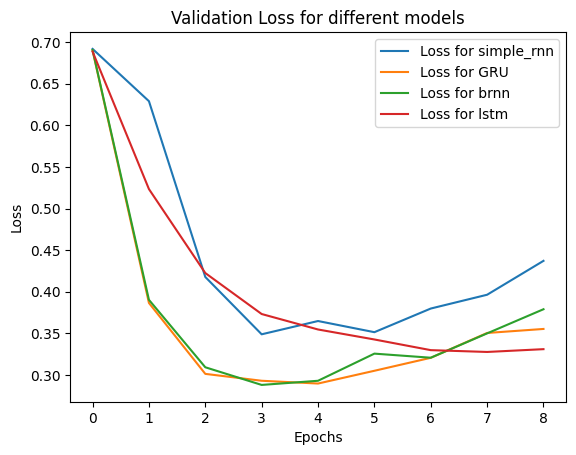

In [50]:
for model, h in histories:
  plt.plot(h.history['val_loss'], label=f'Loss for {model}')
plt.title('Validation Loss for different models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


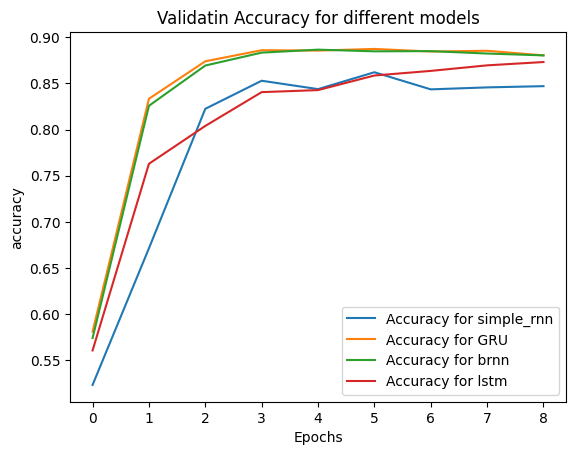

In [49]:
for model, h in histories:
  plt.plot(h.history['val_accuracy'], label=f'Accuracy for {model}')

plt.title('Validatin Accuracy for different models')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Модель "Simple rnn":
*  Test loss:  0.4479314386844635
*  Test accuracy:  0.8362799882888794
*   Time of training - 370 c

Модель "GRU":
*  Test loss:  0.382647514343261
*  Test accuracy:  0.8682399988174438
*   Time of training - 803 c

Модель "LSTM":
*  Test loss:  0.3604917526245117
*  Test accuracy:  0.8634799718856812
*   Time of training - 151 c

Модель "BRNN":
*  Test loss:  0.42208725214004517
*  Test accuracy:  0.8654000163078308
*   Time of training - 1529 c

Deep BRNN: (6 epoch)

*  Test loss:  0.38069483637809753
*  Test accuracy:  0.8583999872207642
*   Time of training - 1649 c


Найгірший результат показала проста RNN архітектура. Найкращий LSTM. GRU - дуже близьке до LSTM по accuracy, але  loss показник гірший